# 09：Shaly Sand modeling

In [14]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.rcParams['font.size']=14
plt.rcParams['font.family']='arial'

<div class="alert alert-block alert-success">
<b>Learning Objectives:</b>
<ul>
    <li>Thomas–Stieber Model for Sand–Shale Systems</li>
    <li>Net-to-gross ratio</li>
    <li>Dvorkin–Gutierrez Elastic Models for sand-shale mixture</li>
</ul>
</div>

## Thomas-Stieber Sand-Shale mixture model

The following ternary diagram shows the main Sand-Shale mixtures considered in Thomas-Stieber model for the porosity of  thinly-bedded Sand shale systems. The model assumes that thinly-bedded Sand shale systems can be constructed by mixing clean high porosity sand and low porosity shale. The porosity of each mixtures in the diagram are analysed as follows:

1. Pure shale: 
$
\phi=\phi_{shale}
$

2. Pure clean sand: 
$
\phi=\phi_{sand}
$

3. Dirty Sand (Sand with dispersed shale in the pore space): 
$
\phi=\phi_{sand}-V_{shale}(1-\phi_{shale})
$

4. Sand with pore space completely filled with shale: 
$
\phi=\phi_{sand}\phi_{shale}$ $V_{shale}=\phi_{sand}
$

5. Shale with dispersed quartz grains: 
$
\phi=V_{shale}\phi_{shale}$  $V_{shale} \neq \phi_{sand}
$

6. Sand with structural shale clasts: 
$
\phi=\phi_{sand}+\phi_{shale}V_{shale}
$

<img src='sand_shale.PNG' style='width:300px;height:350px'/>

From The handbook of rock physics (Mavko, 2020)

A thinly interbedded or laminated system of rocks has total porosity:

$
\phi=\sum_{i}X_i\phi_i
$

where $\phi_i$ is the total porosity of the ith layer, and $X_i$ is the thickness fraction of the ith
layer. For a laminated sequence of shale and dirty sand, the total porosity is

$
\phi=N / G\left[\phi_{\text {clean sand }}-\left(1-\phi_{\text {shale }}\right) V_{\text {disp shale }}\right]+(1-N / G) \phi_{\text {shale }}
$

where **net-to-gross, N/G**, is the thickness fraction of sand layers. N/G is not identical to the shale fraction, since some dispersed shale can be within the sand.

In [34]:
def ThomasStieber(phi_sand, phi_sh, vsh):
    """Thomas-Stieber porosity model for sand-shale system. Written by Jiaxin Yu (July 2021)

    Args:
        phi_sand (frac): clean sand porosity
        phi_sh (frac): shale porosity
        vsh (frac): volume faction of shale in the mixture

    Returns:
        phi_ABC,phi_AC (frac): porosity line as shown in Fig 5.3.2 in (Mavko,2020)
    """    
    phi1=phi_sand-(1-phi_sh)*vsh# dirty sand
    phi2=phi_sh*vsh
    phi_ABC= np.maximum(phi1,phi2)# take values sitting above 
    phi_AD=phi_sand+ phi_sh*vsh # structured shale 
    ##join point A and C
    m= phi_sh-phi_sand
    b= phi_sand
    phi_AC= m*vsh+b
    return phi_ABC,phi_AC

## Example 1:
Let's make a plot showing Porosity versus shale volume in the Thomas–Stieber model. 

<ipython-input-35-47bbb768d7f2>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


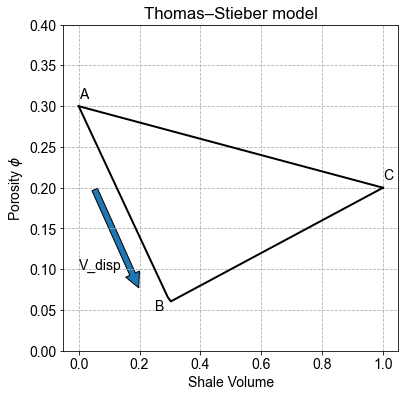

In [35]:
phi_sand=0.3
phi_sh=0.2
vsh=np.linspace(0,1,100)
phi_ABC,phi_AC=ThomasStieber(phi_sand, phi_sh, vsh)
# plot
plt.figure(figsize=(6,6))
plt.xlabel('Shale Volume')  
plt.ylabel('Porosity $\phi$')
plt.xlim(-0.05,1.05)
plt.ylim(0,0.4)
plt.title('Thomas–Stieber model')
plt.plot(vsh, phi_ABC,'-k',lw=2,label='sand with dispersed shale')
plt.plot(vsh, phi_AC,'-k',lw=2,label='shale with dispersed quartz')
plt.grid(ls='--')
plt.text(0,0.31, 'A')
plt.text(0.25,0.05, 'B')
plt.text(1,0.21, 'C')
plt.text(0.,0.1, 'V_disp')
ax = plt.axes()
arrow = mpatches.FancyArrowPatch((0.05,0.2), (0.2, 0.075),mutation_scale=30)
ax.add_patch(arrow)


From A to B, the amount of dispersed shale increases. $V_{disp}$ is the volume of dispersed shale in the sand pore space. The minimum porosity occurs at point B when the sand porosity is completely filled with shale

<ipython-input-37-2660ce369a0a>:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


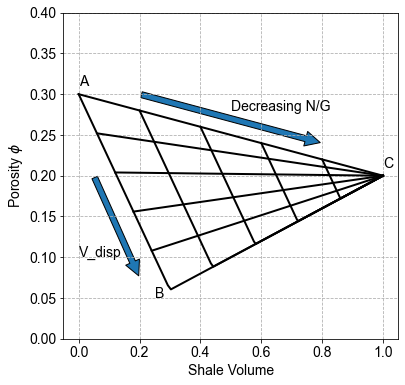

In [37]:
# input 
phi_sand=0.3
phi_sh=0.2
# draw ABC outline
vsh=np.linspace(0,1,100)
phi1=phi_sand-(1-phi_sh)*vsh# dirty sand
phi2=phi_sh*vsh
phi_ABC= np.maximum(phi1,phi2) # take values sitting above
m= phi_sh-phi_sand
b= phi_sand
phi_AC= m*vsh+b

plt.figure(figsize=(6,6))
plt.xlabel('Shale Volume')  
plt.ylabel('Porosity $\phi$')
plt.plot(vsh, phi_ABC,'-k',lw=2,label='sand with dispersed shale')
plt.xlim(-0.05,1.05)
plt.ylim(0,0.4)
plt.plot(vsh, phi_AC,'-k',lw=2,label='shale with dispersed quartz')
plt.grid(ls='--')
# draw inner crosslines
NG=np.linspace(0.2,0.8,4) # net-to-gross ratio
for i, val in enumerate(NG):
    vsh=np.linspace(1-val,1,100)
    
    phi3= val*phi1+(1-val)*phi_sh
    phi2=phi_sh*vsh
    phi3= np.maximum(phi3,phi2) 
    plt.plot(vsh, phi3,'-k',lw=2,label='structured shale')

    x1= (phi_sand*val)
    y1= phi_sand-(1-phi_sh)* x1 
    m= (y1-phi_sh)/(x1-1)
    b=  (x1*phi_sh - y1)/(x1-1)
    line= m* np.linspace(x1,1,100)+b
    plt.plot(np.linspace(x1,1,100), line,'-k',lw=2,label='structured shale')

plt.text(0,0.31, 'A')
plt.text(0.25,0.05, 'B')
plt.text(1,0.21, 'C')
plt.text(0.,0.1, 'V_disp')
plt.text(0.5,0.28, 'Decreasing N/G')
ax = plt.axes()
arrow1= mpatches.FancyArrowPatch((0.05,0.2), (0.2, 0.075),mutation_scale=30)
ax.add_patch(arrow1)
arrow2= mpatches.FancyArrowPatch((0.2,0.3), (0.8, 0.24),mutation_scale=30)
ax.add_patch(arrow2)

## Dvorkin–Gutierrez Elastic Models
Several authors (e.g., Marion, 1990; Yin, 1992; Dvorkin and Gutierrez, 2002; Avseth et al.,
2010) have extended the Thomas–Stieber approach to model elastic properties of clastics
composed of sand and shale end members (Figure 5.3.5). The velocity-porosity trend of
“sandy shale” (line B-C in Figure 5.3.5) has been modeled using a Hashin–Shtrikman lower
bound (HSLB) extending from the shale point to the sand mineral point, passing through
point B (sometimes call the “V-point”), which might be physically realized as a mixture of
elastically stiff grains (e.g., quartz) enveloped by softer microporous shale. One can
similarly model the “shaly-sand” trend (line A-B in Figure 5.3.5) as a HSLB extending from the clean sand point to the V-point. (Heuristically, the role of the HSLB is that of a “soft
interpolator” between specified end points, as discussed in Section 7.1. For the sandy-shale
trend, we imagine quartz mineral suspended in the much softer load-bearing shale matrix.
For the shaly-sand trend, we imagine that the quartz sand is load bearing, and that
a substantial fraction of the clay mineral sits passively in the pore space

shaly sand: Sand grains are load bearing and clay particles fill the pore space without disturbing the sand pack.
sandy shale: Sand grains are suspended in the clay volume so both constituents become load bearing. 

Pore-filling clay cause a stiffening of rock frame in sands. Hence, a velocity ambiguity is expected between clean, unconsolidated sands and clay-rich shales.

## Dvorkin–Gutierrez silty shale model

The porosity of a shale as a function of clay content, assuming
silt grains to be dispersed in the clay matrix, can be expressed as:

$
\phi=\phi_{sh}C
$

where $\phi_{sh}$ is the porosity of a clean shale, and $C$ is the volume fraction of shale in sand-shale mixture. Note: one can approximate a clean shale as a granular medium where grains are clay particles and pore space are filled by fluid.

$
K_{\mathrm{sat}}=\left[\frac{C}{K_{\mathrm{sh}}+(4 / 3) \mu_{\mathrm{sh}}}+\frac{1-C}{K_{\mathrm{qz}}+(4 / 3) \mu_{\mathrm{sh}}}\right]^{-1}-\frac{4}{3} \mu_{\mathrm{sh}}
$

$
\mu_{\mathrm{sat}}=\left[\frac{C}{\mu_{\mathrm{sh}}+Z_{\mathrm{sh}}}+\frac{1-C}{\mu_{\mathrm{qz}}+Z_{\mathrm{sh}}}\right]^{-1}-Z_{\mathrm{sh}}
$

where

$
Z_{\mathrm{sh}}=\frac{\mu_{\mathrm{sh}}}{6}\left(\frac{9 K_{\mathrm{sh}}+8 \mu_{\mathrm{sh}}}{K_{\mathrm{sh}}+2 \mu_{\mathrm{sh}}}\right)
$

$K_{sh}$ and $\mu_{sh}$ are the saturated elastic moduli of pure shale, respectively. These could be derived from well-log measurements of $V_P$, $V_S$ and density in a pure shale zone. By adding silt or sand particles, the clay content reduces, and the elastic moduli will
stiffen. The variables $K_{qz}$ and $\mu_{qz}$ are the mineral moduli of the silt grains, commonly
assumed to consist of 100% quartz. The bulk density of shales with dispersed silt is
given by:

$
\rho_{\mathrm{b}}=(1-C) \rho_{\mathrm{qz}}+C\left(1-\phi_{\mathrm{sh}}\right) \rho_{\mathrm{clay}}+C \phi_{\mathrm{sh}} \rho_{\mathrm{fl}}
$

where $\rho_{qz}$ is the density of the silt mineral (2.65 g/cm3 for quartz) and $\rho_{clay}$ is the density
of the solid clay.

In [38]:
def silty_shale(C, Kq,Gq, Ksh, Gsh):
    """Dvorkin–Gutierrez silty shale model: model the elastic moduli of decreasing clay content for shale. Written by Jiaxin Yu (July 2021)

    Args:
        C (frac): volume fraction of clay
        Kq (GPa): bulk modulus of silt grains
        Gq (GPa): shear modulus of silt grains
        Ksh (GPa): saturated bulk modulus of pure shale
        Gsh (GPa): saturated shear modulus of pure shale
        ** Ksh and Gsh could be derived from well-log measurements of VP, VS and density in a pure shale zone.

    Returns:
        K_sat, G_sat: elastic moduli of the saturated silty shale.
    """    

    K_sat = ( C/(Ksh+4*Gsh/3)+ (1-C)/(Kq+4*Gq/3) )**-1 -4*Gsh/3
    Zsh = Gsh/6 *(9*Ksh+8*Gsh)/(Ksh+2*Gsh)
    G_sat = (C/(Gsh+Zsh) + (1-C)/(Gq+Zsh))**-1 -Zsh
    return K_sat,G_sat

## Dvorkin–Gutierrez shaly sand model
The variation of saturated elastic moduli for sands with increasing clay contnet can be computed via the lower Hashin-Shtrikmann bound, where where $K_{cc}$ and $\mu_{cc}$ are $K_{sat}$ and $\mu_{sat}$ as calculated from the sandy shale model at critical clay content and $K_{ss}$ and $\mu_{ss}$ are $K_{sat}$ and $\mu_{sat}$ as calculated from any clean sandstone model 

$
K_{\mathrm{sat}}=\left[\frac{1-C / \phi_{\mathrm{ss}}}{K_{\mathrm{ss}}+(4 / 3) \mu_{\mathrm{ss}}}+\frac{C / \phi_{\mathrm{ss}}}{K_{\mathrm{cc}}+(4 / 3) \mu_{\mathrm{ss}}}\right]^{-1}-\frac{4}{3} \mu_{\mathrm{ss}}
$

$
\mu_{\mathrm{sat}}=\left[\frac{1-C / \phi_{\mathrm{ss}}}{\mu_{\mathrm{ss}}+Z_{\mathrm{ss}}}+\frac{C / \phi_{\mathrm{ss}}}{\mu_{\mathrm{cc}}+Z_{\mathrm{ss}}}\right]^{-1}-Z_{\mathrm{ss}}
$

$
Z_{\mathrm{ss}}=\frac{\mu_{\mathrm{ss}}}{6} \frac{9 K_{\mathrm{ss}}+8 \mu_{\mathrm{ss}}}{K_{\mathrm{ss}}+2 \mu_{\mathrm{ss}}}
$

In [39]:
def shaly_sand(phis, C, Kss,Gss, Kcc, Gcc):
    """Modeling elastic moduli for sand with increasing clay content using LHS bound rather than using Gassmann relation. Written by Jiaxin Yu (July 2021)

    Args:
        phis (porosity): critical porosity of sand composite
        C (frac): clay content 
        Kss (GPa): saturated bulk moduli for clean sandstone using e.g. HM
        Gss (GPa): saturated shear moduli for clean sandstone using e.g. HM
        Kcc (GPa): saturated bulk moduli calculated from the sandy shale model at critical clay content using silty shale model  
        Gcc (GPa): saturated shear moduli calculated from the sandy shale model at critical clay content using silty shale model

    Returns:
        K_sat,G_sat: saturated rock moduli of the shaly sand 
    """    
    K_sat = ( (1-C/phis)/(Kss+4*Gss/3)+ (C/phis)/(Kcc+4*Gss/3) )**-1 -4*Gss/3
    Zss = Gss/6 *(9*Kss+8*Gss)/(Kss+2*Gss)
    G_sat = ((1-C/phis)/(Gss+Zss) + (C/phis)/(Gcc+Zss))**-1 -Zss
    return K_sat,G_sat

## Example 2:
Let's visualize the Dvorkin–Gutierrez models for a complete sandy shale to shaly
sand sequence in the porosity-bulk modulus space.

In [40]:
from model import *

In [55]:
# Specify model parameters
K0, G0 = 37, 45 ## bulk and shear modulus of quartz grain in sand 
Kcl, Gcl = 21, 8 # clay particle moduli in shale 
Kf= 2.5 #Gpa fluid bulk modulus
phic_clay=0.2 # critical porosity for clay particles
phic_sand=0.3 # critical porosity for sand particles
Cn_sand=8.6  #coordination number in sand 
Cn_shale=14 #coordination number in shale 
sigma=20 # effective pressure 
f=0.5# reduced shear factor
phi = np.linspace(1e-7,0.35,100) #define porosity range according to critical porosity
C=np.linspace(phic_sand,0,100)# shale volume reverse order!!!!

# compute Kss and Gss using HM modeling
Kss_dry, Gss_dry=hertzmindlin(K0, G0, phic_sand, Cn_sand, sigma, f)
Kss, Gss= Gassmann(Kss_dry,Gss_dry,K0,Kf,phic_sand)
# approximate Ksh and Gsh of pure shale using HM modelling
Ksh_dry, Gsh_dry= hertzmindlin(Kcl, Gcl, phic_clay, Cn_shale, sigma, f)
Ksh, Gsh=  Gassmann(Ksh_dry,Gsh_dry,Kcl,Kf,phic_clay)
# compute Kcc and Gcc at critical shale volume, i.e. C=phic_sand
Kcc,Gcc=silty_shale(phic_sand, K0,G0, Ksh, Gsh)
# shaly sand curve
Ksat1, Gsat1= shaly_sand(phic_sand, C, Kss,Gss, Kcc, Gcc)
phi_= phic_sand-C*(1-phic_clay) # thomas-stieber shaly sand porosity model
# sandy shale curve 
C_=np.linspace(phic_sand,1, 100)#shale content increases from 30% to 100%
Ksat2, Gsat2= silty_shale(C_,K0,G0, Ksh, Gsh) 
phi_2=C_*phic_clay


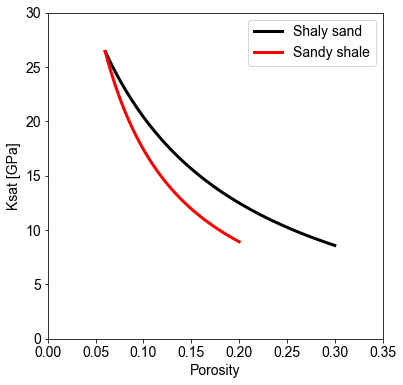

In [58]:
# plot
plt.figure(figsize=(6,6))
plt.xlabel('Porosity')
plt.ylabel('Ksat [GPa]')
plt.xlim(0,0.35)
plt.ylim(0,30)
plt.plot(phi_, Ksat1,'-k',lw=3,label='Shaly sand')
plt.plot(phi_2, Ksat2,'-r',lw=3,label='Sandy shale')
plt.legend()

<div class="alert alert-block alert-info">
<b>Reference:</b> 
<ul>
    <li>Mavko, G., Mukerji, T. and Dvorkin, J., 2020. The rock physics handbook. Cambridge university press.</li>
    <li>Dvorkin, J. and Gutierrez, M.A., 2002. Grain sorting, porosity, and elasticity. Petrophysics, 43(03).</li>
    <li>Avseth, P., Mukerji, T. and Mavko, G., 2010. Quantitative seismic interpretation: Applying rock physics tools to reduce interpretation risk. Cambridge university press.</li>
    
</ul>
</div>